## Mini Project: Customer Behavior with Machine Learning
### About the dataset
> * `age`: Age of the customer. <br>
> * `gender`: Gender of the customer. <br>
> * `income`: Annual income of the customer. <br>
> * `education`: Education level of the customer. <br>
> * `region`: Region where the customer resides. <br>
> * `loyalty_status`: Loyalty status of the customer. <br>
> * `purchase_frequency`: Frequency of purchases made by the customer. <br>
> * `purchase_amount`: Amount spent by the customer in each purchase. <br>
> * `product_category`: Category of the purchased product. <br>
> * `promotion_usage`: Indicates whether the customer used promotional offers (0 for No, 1 for Yes). <br>
> * `satisfaction_score`: Satisfaction score of the customer. <br><br>
Dataset taken from Kaggle: https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset/data 

In [1]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
# read data
df = pd.read_csv('customer_data.csv')

In [3]:
# check the shape of the data
df.shape

(100000, 12)

In [4]:
# check the first 5 rows of the data
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


## Data Cleaning

In [5]:
# check for any missing values
df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [6]:
print("Amount of duplicated values in df: " , df.duplicated().sum())

Amount of duplicated values in df:  0


## EDA

In [7]:
# view the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [8]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


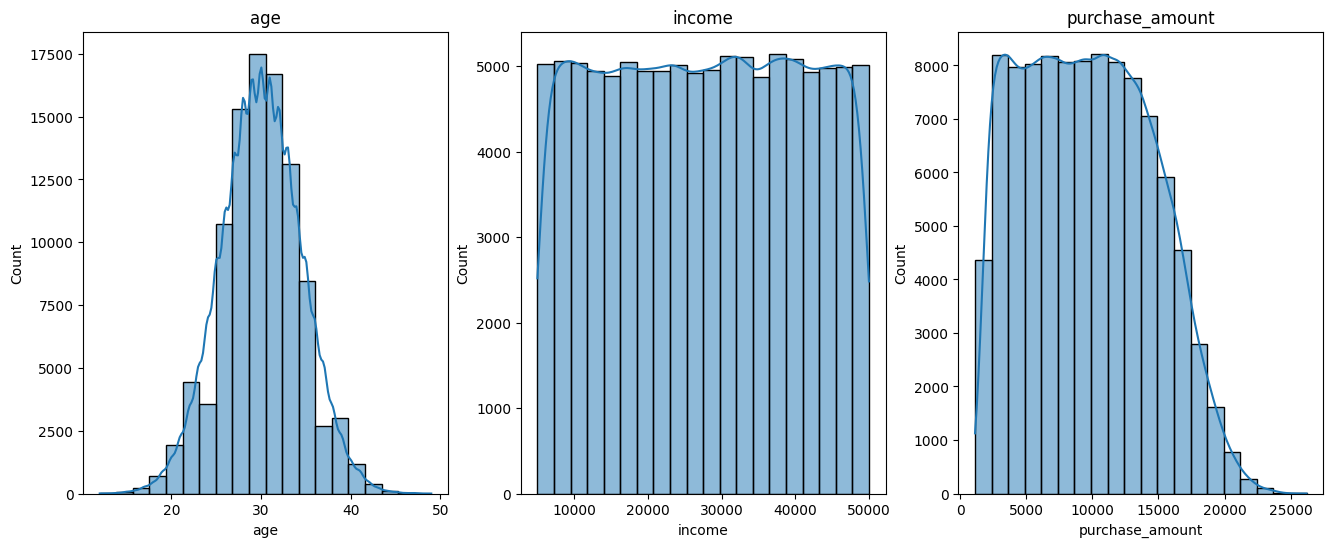

In [23]:
# visualization on distribution of numerical features
plt.figure(figsize=(16, 6))
numerical_columns = ["age", "income", "purchase_amount"]

for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)
plt.show()

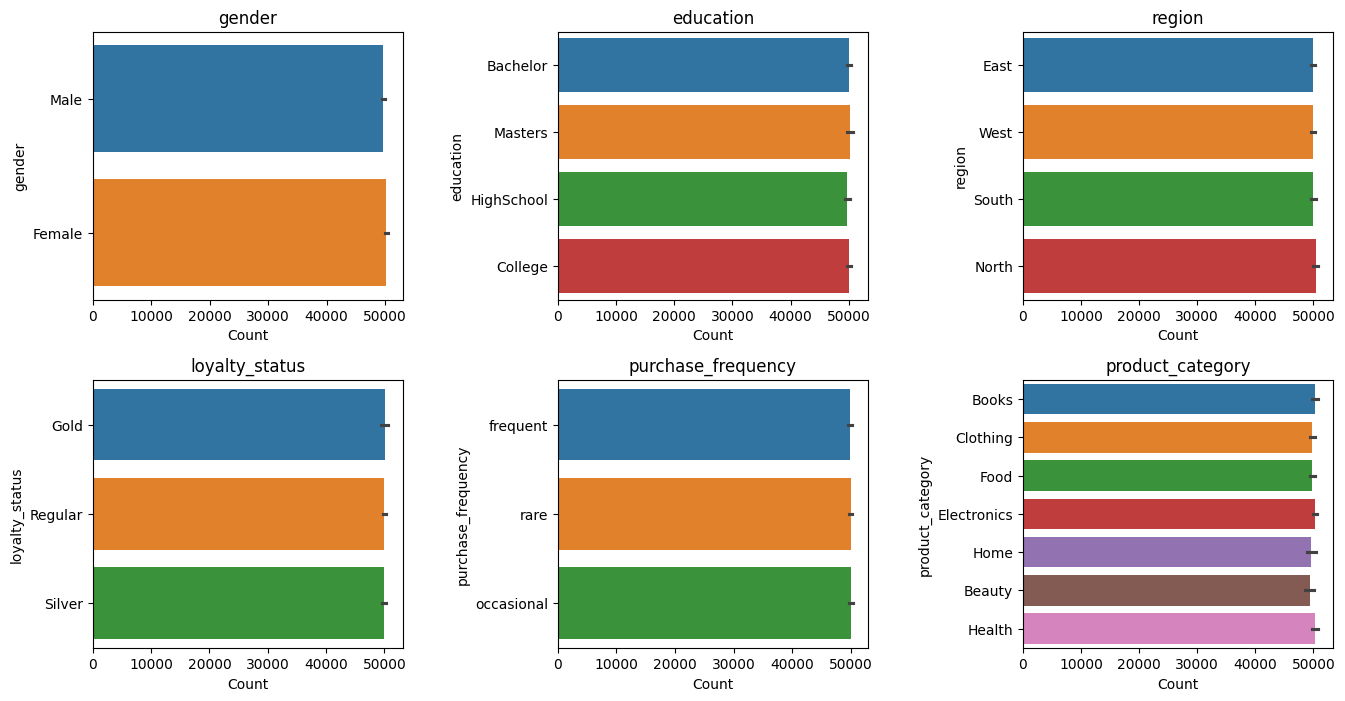

<Figure size 640x480 with 0 Axes>

In [4]:
# visualization on distribution of categorical features
plt.figure(figsize=(16, 8))
categorical_columns = ["gender", "education", "region", "loyalty_status", "purchase_frequency", "product_category"]

for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i+1)
    sns.barplot(df[col], palette="tab10")
    plt.title(col)
    plt.xlabel("Count")
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()
plt.tight_layout()

## Machine Learning

In [8]:
df_model = df.copy()

Create a copy of original data frame to be used specifically for modeling.

### Analysis 1: K-Means Algorithm
There are several analysis we can perform with k-means to discover clustering on customer behavior. We will perform 1 simple clustering on customer's income and purchase amount.
* Objective: To identify customer segmentation based on customer's income and purchase amount.
* Type of ML: Unsupervised learning

In [9]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
# select the features for clustering
features = ["income", "purchase_amount"]

# standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_model[features])

According to the objective, we wants to identify cluster on customer's income and purchase amount. First, we select our target features, then we standardize the data to ensure accurate clustering results.

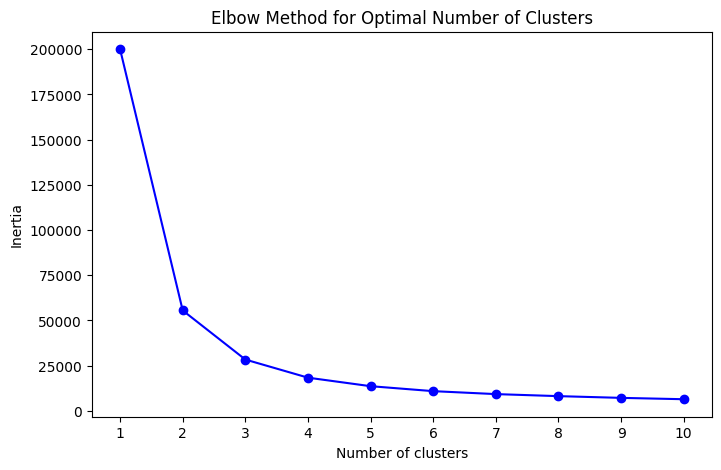

In [72]:
# evaluation method 1: Elbow Method
# find the optimal number of k clusters using the Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.show()

The graph above shows that potential elbow points form at k=2 and k=3, indicating both might be the optimal number of clusters. To further investigate, we will look at another evaluation method.

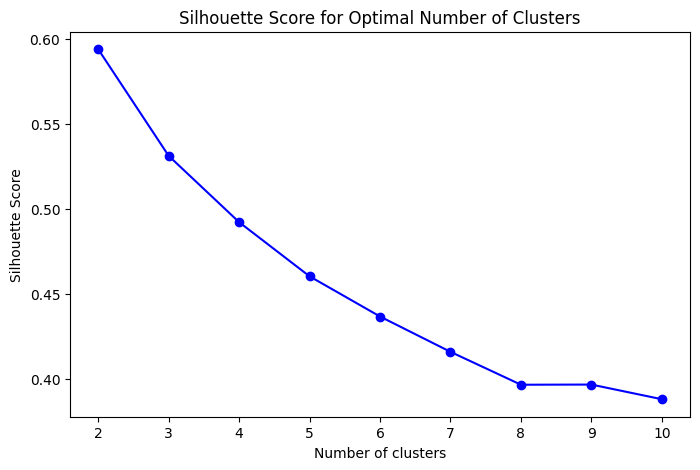

In [70]:
# evaluation method 2: SilhouetteScore
# find the optimal number of k clusters using the Silhouette Score

scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    scores.append(silhouette_avg)

# plot the Silhouette Score graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xticks(k_range)
plt.show()

The graph above shows the highest silhouette value of about 0.59 at k=2, followed by k=3 at about 0.53. If we combine both scoring methods, we see that k=2 is a slightly better choice than k=3. Therefore, we will plot 2 models and observe the clusters to determine the best cluster for customer segmentation.

In [12]:
# fit the model with k=2
km_2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
km_2.fit(scaled_features)

KMeans(n_clusters=2, random_state=42)

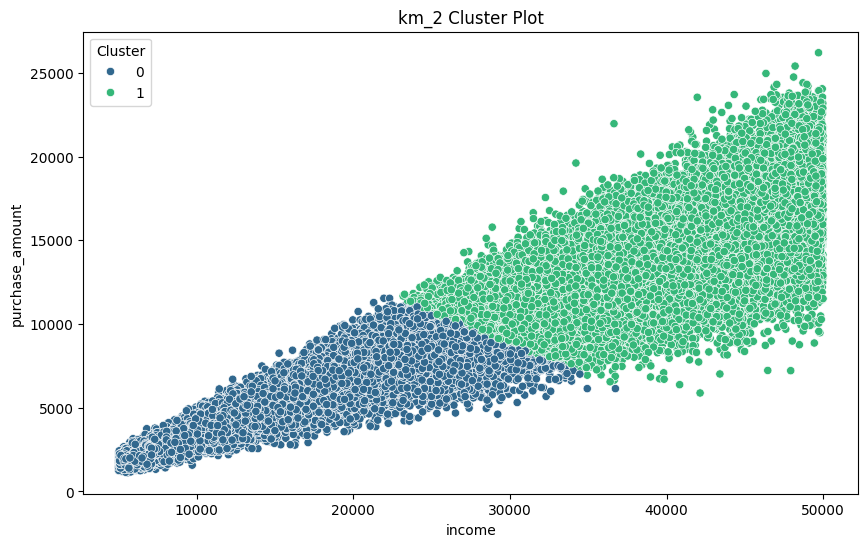

In [13]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='income', y='purchase_amount', hue=km_2.labels_, palette='viridis')
plt.title("km_2 Cluster Plot")
# plt.xlabel("Income")
# plt.ylabel("Purchase Amount")
plt.legend(title="Cluster")
plt.show()

In [14]:
# fit the model with k=3
km_3 = KMeans(n_clusters=3, random_state=42, n_init='auto')
km_3.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

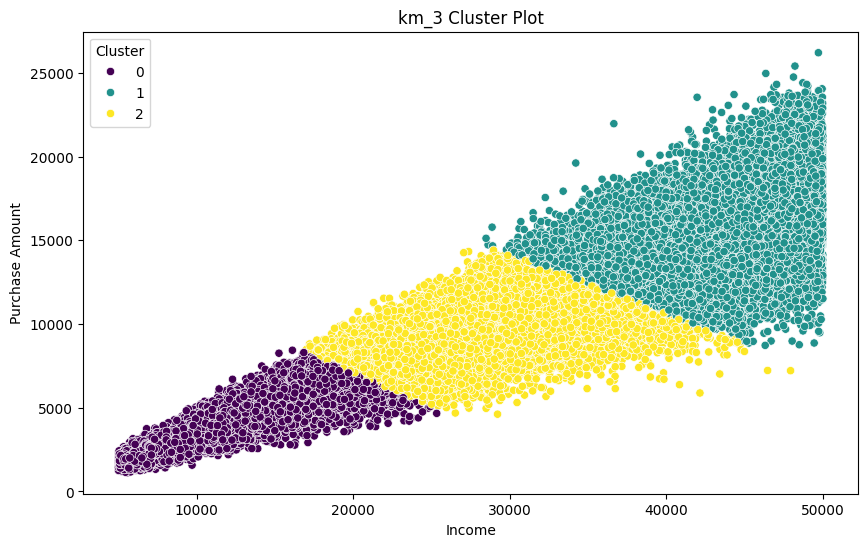

In [15]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='income', y='purchase_amount', hue=km_3.labels_, palette='viridis')
plt.title("km_3 Cluster Plot")
plt.xlabel("Income")
plt.ylabel("Purchase Amount")
plt.legend(title="Cluster")
plt.show()

### <b> What can we learn from the graph? </b>
If we look at both graphs, the km_3 plot displays more revealing results than km_2, so we will analyse the km_3 plot. We can identify 3 distinct customer segments based on their income and purchase amount:
* <b> Low income, low purchase (Cluster 0): </b>Customers with low income and low spend.
* <b> Mid income, moderate purchase (Cluster 2): </b>Customers with medium income and moderate spend.
* <b> High income, high purchase (Cluster 1): </b>Customers with high income and high spend.


If a company understands customer segmentation, it can predict customer behavior and create business plans to increase sales. For example, the company could offer a loyalty program that specifically targets high-spending customers. This way, the company can inform premium members about exclusive special offers, personalized recommendations and premium events to boost their loyalty.

### <b> Conclusion </b>
This project is a simple customer behavior analysis on identifying customer segmentation using unsupervised machine learning, which in this case, K-Means clustering. Thus, the work might not corresponds with real-world business scenarios, however, it is a quick and simple headstart to understand what machine learning is and how it can predict and improve customer behavior for businesses. For typical business scenario, data scientist could perform more analysis and technical strategies to generate more realistic and business related insights.

### Analysis 2: K-Means Algorithm
There are several analysis we can perform with k-means to discover clustering on customer behavior, thus we will perform 1 simple clustering on customer's loyalty status and purchase amount.
* Objective: To identify customer segmentation based on customer's loyalty status and purchase amount.
* ML: K-Means Clustering
* Type of ML: Unsupervised learning

In [6]:
from sklearn import preprocessing

In [29]:
# encode the loyalty_status column manually
# follow the order: Regular < Silver < Gold
loyalty_mapping = {'Regular': 0, 'Silver': 1, 'Gold': 2}

df_model['loyalty_encoded'] = df_model['loyalty_status'].map(loyalty_mapping)

df_model.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,loyalty_encoded
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,0
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,1
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,0
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,0


In [31]:
# select the features for clustering
features = ["loyalty_encoded", "purchase_amount"]

# standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_model[features])

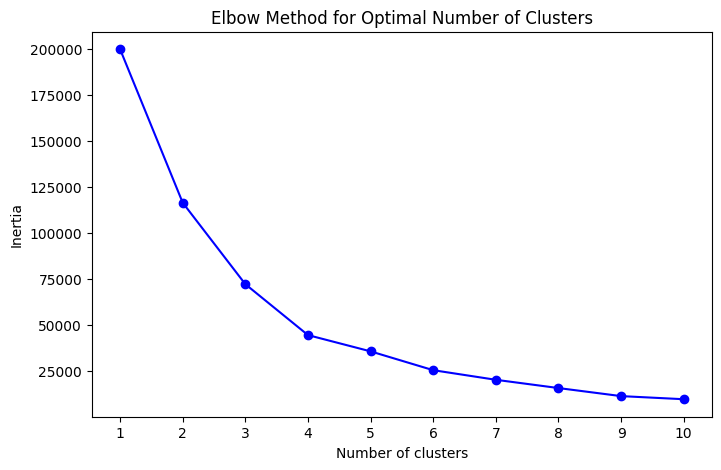

In [35]:
# evaluation method 1: Elbow Method
# find the optimal number of k clusters using the Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.show()

The elbow point appears to be at k=4. We will evaluate with 1 more method: silhouette score.

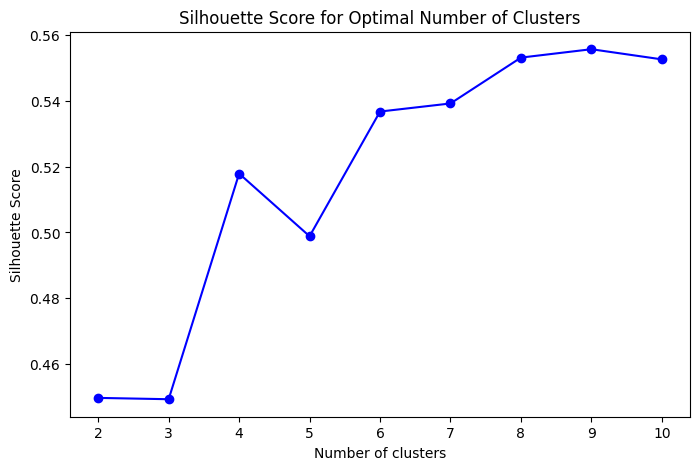

In [33]:
# evaluation method 2: SilhouetteScore
# find the optimal number of k clusters using the Silhouette Score

scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    scores.append(silhouette_avg)

# plot the Silhouette Score graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xticks(k_range)
plt.show()

In [36]:
# fit the model with k=3
km_4 = KMeans(n_clusters=4, random_state=42, n_init='auto')
km_4.fit(scaled_features)

KMeans(n_clusters=4, random_state=42)

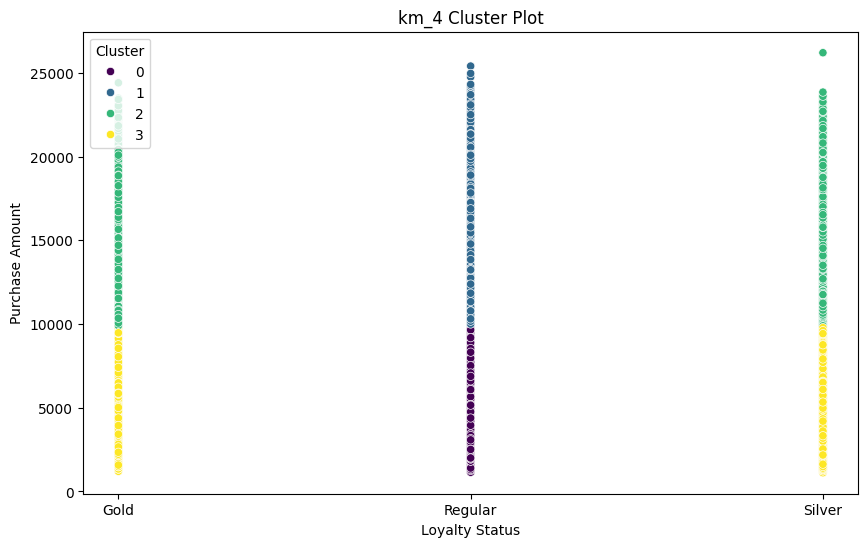

In [38]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='loyalty_status', y='purchase_amount', hue=km_4.labels_, palette='viridis')
plt.title("km_4 Cluster Plot")
plt.xlabel("Loyalty Status")
plt.ylabel("Purchase Amount")
plt.legend(title="Cluster")
plt.show()

## <u> References </u>
1. <a href="https://www.kaggle.com/code/obrunet/customer-segmentation-k-means-analysis/notebook#Credits">Kaggle</a>
2. <a href="https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#:~:text=K%2Dmeans%20clustering%20is%20a,or%20structures%20within%20the%20data.">K-Means Clustering</a>
3. <a href="https://medium.com/@nirmalsankalana/k-means-clustering-choosing-optimal-k-process-and-evaluation-methods-2c69377a7ee4">Evaluation Method for k</a>